# Run DEICODE/Gemelli Robust PCA (RPCA) in python instead of R

source: https://github.com/biocore/gemelli/blob/master/ipynb/tutorials/RPCA-moving-pictures-standalone-cli-and-api.ipynb

## Run if need to install:

In [3]:
# !pip install gemelli

     |████████████████████████████████| 74 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 5.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 941 kB 12.6 MB/s eta 0:00:01
  Created wheel for biom-format: filename=biom_format-2.1.14-cp38-cp38-macosx_10_9_x86_64.whl size=11739420 sha256=b05f09e371d4dc1003b5b2e24e85c1bfeaab0a47c5208d31c5fe9dd6743da74c
  Stored in directory: /Users/kpitz/Library/Caches/pip/wheels/e0/7d/69/7abe2636fe2544a6d2f87aadc01a223d8f6a1e316270acdb11
  Created wheel for iow: filename=iow-1.0.6-cp38-cp38-macosx_10_9_x86_64.whl size=707627 sha256=034d3524c786a42bd646c461fdc97c1abbcac79b9d10bc7c098ebf8be97eff4d
  Stored in directory: /Users/kpitz/Library/Caches/pip/wheels/a3/a5/b6/a830d50d5077c0e34c3e7602f995ab94d3917ec8f17a1a1282
  Created wheel for tax2tree: filename=tax2tree-1.1-py3-none-any.whl size=27770 sha2

In [4]:
from biom import load_table
from gemelli.rpca import auto_rpca

In [5]:
# import the data table, for now a test table from DEICODE analysis R script
table = load_table('/Users/kpitz/github/NOAA-NCAR-Hackathon/Qiime_Results/COI/table.w_md.biom')
# perform RPCA with auto. rank estimation
ordination, distance = auto_rpca(table)

/Users/kpitz/opt/miniconda3/lib/python3.8/site-packages/gemelli/preprocessing.py:418: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))


Estimated rank is 3


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#from assets.plotting_helper import biplot
#%matplotlib inline

# import the sample metadata
mf = pd.read_csv('/Users/kpitz/github/NOAA-NCAR-Hackathon/Qiime_Results/COI/Qiime2_meta.tsv',
                 sep='\t', index_col=0)
mf.loc[mf.index.str.contains('CN18F'), 'cruise'] = 'CN18F'
mf.loc[mf.index.str.contains('CN18S'), 'cruise'] = 'CN18S'
mf.loc[mf.index.str.contains('Lasker18'), 'cruise'] = 'Lasker18'
print(mf['cruise'].unique())

# import the taxonomy metadata
tf = pd.read_csv('/Users/kpitz/github/NOAA-NCAR-Hackathon/Qiime_Results/COI/Qiime2_taxa.tsv',
                 sep='\t', index_col=0)
# view
mf.head(2)

['CN18F' 'CN18S' 'Lasker18']


,Dataset,cruise
#SampleID,,
CN18FESPkoa_SC58_FF,Merged2018,CN18F
CN18FESPkoa_SC57_FF,Merged2018,CN18F


In [30]:
tf.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species
#OTUID,,,,,,,
ASV_1,Eukaryota,Arthropoda,Hexanauplia,Poecilostomatoida,Oncaeidae,g_,s_
ASV_2,Eukaryota,unassigned,unassigned,unassigned,unassigned,g_,s_
ASV_3,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned
ASV_4,Eukaryota,Rhodophyta,Bangiophyceae,Bangiales,Bangiaceae,g_,s_
ASV_5,Eukaryota,Picozoa,unknown,unknown,unknown,g_,s_


In [31]:
# the sample loadings
spca_df = ordination.samples
spca_df.head(2)

,PC1,PC2,PC3
CN18FESPkoa_SC58_FF,-0.061604,-0.133757,0.004588
CN18FESPkoa_SC57_FF,-0.069241,-0.133155,-0.004812


In [32]:
# the feature loadings
fpca_df = ordination.features
fpca_df.head(2)

,PC1,PC2,PC3
ASV_1,-0.000503,-0.182661,0.061465
ASV_2,-0.043287,-0.046113,0.037631


TypeError: 'OrdinationResults' object is not subscriptable

In [33]:
# merge the sample metadata and loadings
spca_df = pd.concat([spca_df, mf.reindex(spca_df.index)],
                    axis=1, sort=True)
spca_df.head(2)

,PC1,PC2,PC3,Dataset,cruise
CN18FESPkoa_SC24_FF,-0.052684,-0.095779,0.088300,Merged2018,CN18F
CN18FESPkoa_SC26_FF,-0.067741,-0.099398,0.111198,Merged2018,CN18F


In [34]:
# merge the feature metadata and loadings
fpca_df = pd.concat([fpca_df, tf.reindex(fpca_df.index)],
                    axis=1, sort=True)
fpca_df.head(2)

,PC1,PC2,PC3,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV_1,-0.000503,-0.182661,0.061465,Eukaryota,Arthropoda,Hexanauplia,Poecilostomatoida,Oncaeidae,g_,s_
ASV_10,0.000736,0.001368,0.178058,Eukaryota,Haptista,Haptophyta,Phaeocystales,Phaeocystaceae,Phaeocystis,Phaeocystis globosa


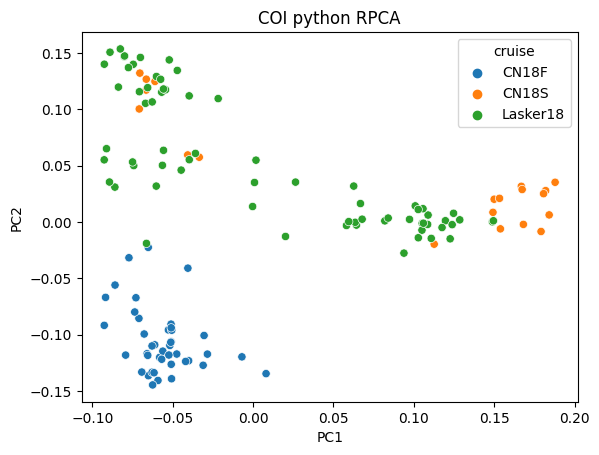

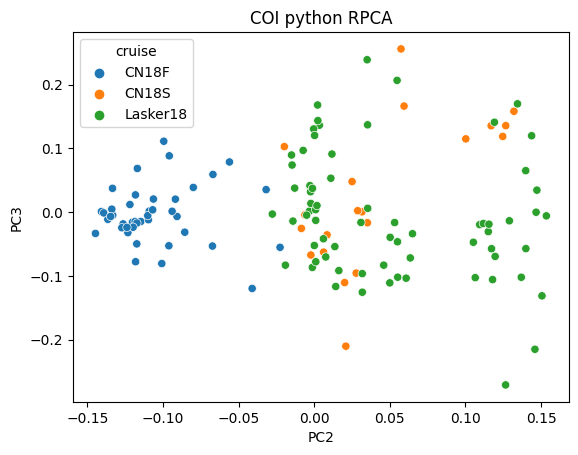

In [42]:
sns.scatterplot(data=spca_df, x="PC1", y="PC2", hue="cruise")
plt.title('COI python RPCA')
plt.show()

sns.scatterplot(data=spca_df, x="PC2", y="PC3", hue="cruise")
plt.title('COI python RPCA')
plt.show()

NameError: name 'biplot' is not defined

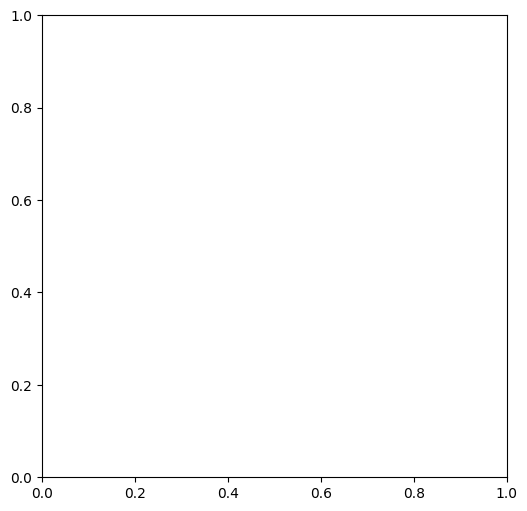

In [35]:
'''fig, ax = plt.subplots(1,1, figsize=(6, 6))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'cruise', ax)

plt.show()'''

In [36]:
from skbio.stats.distance import permanova

permanova(distance, mf['cruise'])

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     131
number of groups                  3
test statistic            56.167109
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object